# Lab  #3

**First and Last Name:** Munevver Coskun

**Student ID:** 500923319

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

NumColmns = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']


In [2]:
def euclideanDistance(point1, point2):
  return np.sqrt(np.sum((point1-point2)**2))

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]


    iterations = 0
    all_centers = [centers.copy()]

    while True:
        # 2a. Assign labels based on closest center
        labels = np.array([np.argmin([euclideanDistance(x, center) for center in centers]) for x in X])

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        iterations += 1
        all_centers.append(centers.copy())
    return all_centers, labels, iterations

points = np.array([[2,10], [2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])

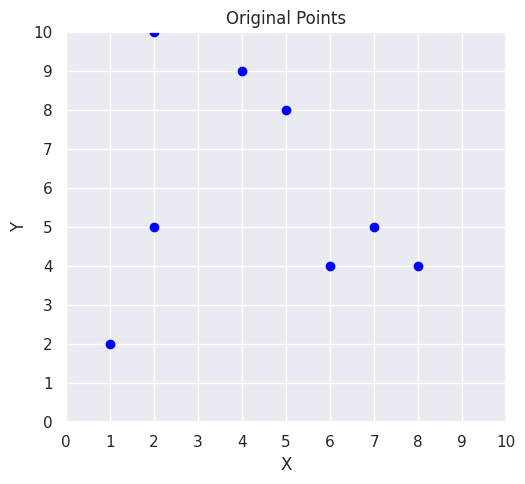

In [3]:
###############  All 8 points on 10x10 space (before any epochs)  ################
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Original Points')
plt.title('Original Points')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(11))
plt.yticks(range(11))
plt.grid(True)

plt.tight_layout()
plt.show()

##PART A

**Q1**: New clusters after 1 epoch

*Cluster1:* A1=[2,10], A4=[5,8], A8=[4,9]

*Cluster2:* A2=[2,5], A7=[1,2]

*Cluster3:* A3=[8,4], A5=[7,5], A6=[6,4]

**Q2**:The centers of the new clusters

C1=[7,5], C2=[2,5], C3=[1,2]

**Q3**:The graphs are provided below

**Q4**: 3 more iterations are needed for convergence (4 in total)

**Q5**: All the plots are provided below

Number of iterations needed for convergence is:  3
Centers after all the iterations:
 [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]


<Figure size 2000x1000 with 0 Axes>

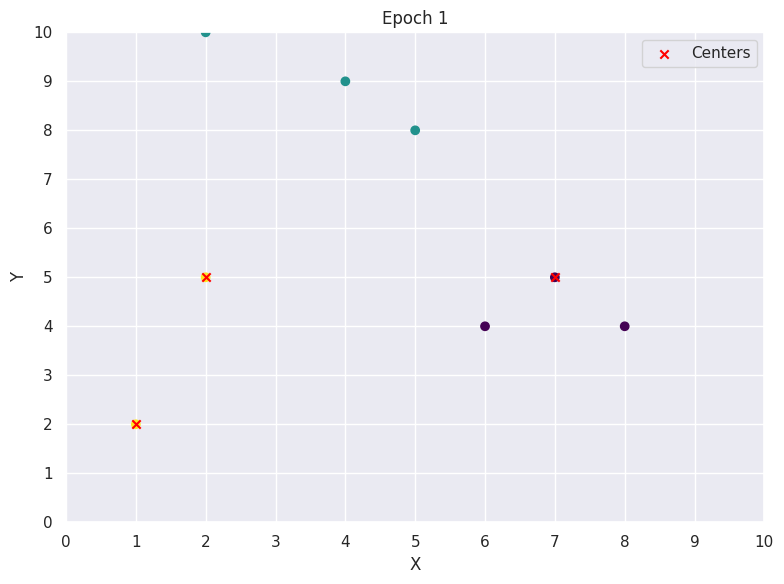

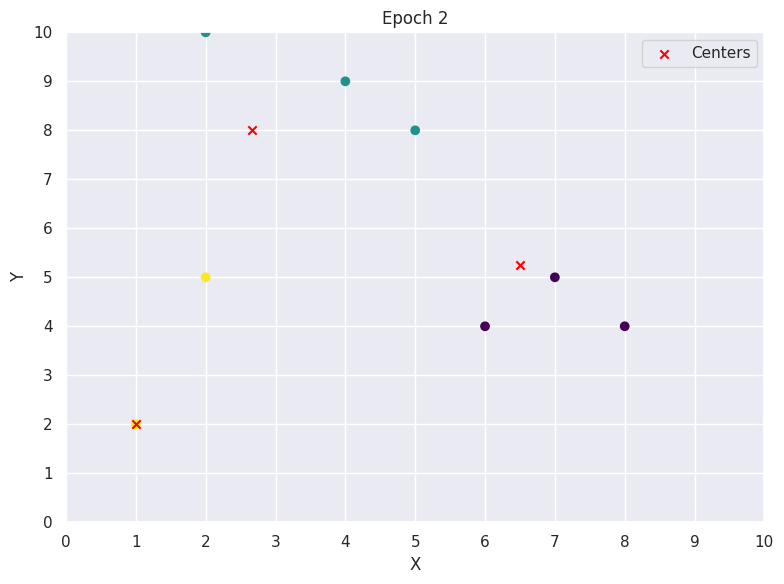

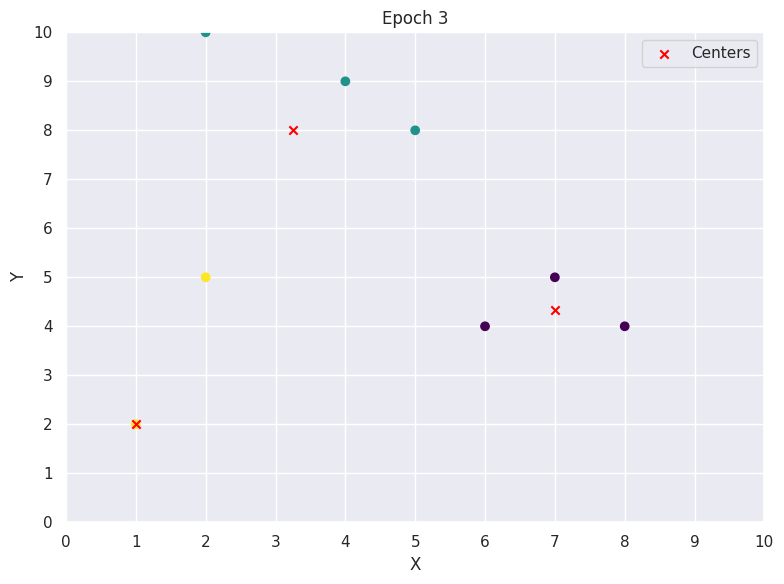

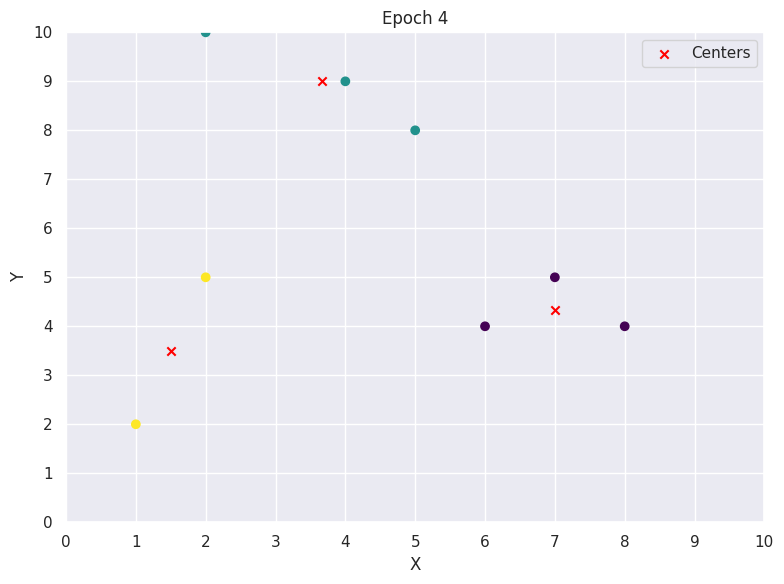

In [4]:
###################  Run Kmeans  ######################

all_centers, labels, iterations = find_clusters(points, 3)

print("Number of iterations needed for convergence is: ", iterations)
print("Centers after all the iterations:\n", all_centers[-1])
plt.figure(figsize=(20, 10))

for epoch, centers in enumerate(all_centers):
    plt.figure(figsize=(8, 6))  # Create a new figure for each iteration
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
    if centers.size > 0:  # Check if centers array is not empty
        plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Centers')
    plt.title(f'Epoch {epoch + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xticks(range(11))
    plt.yticks(range(11))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
print(f"")

###PART A Continued..

**Q6:**Accuracy

Accuracy is 1.00

**Q7:** Plots are provided above

**Q8:** Plots are provided above


Accuracy: 1.00


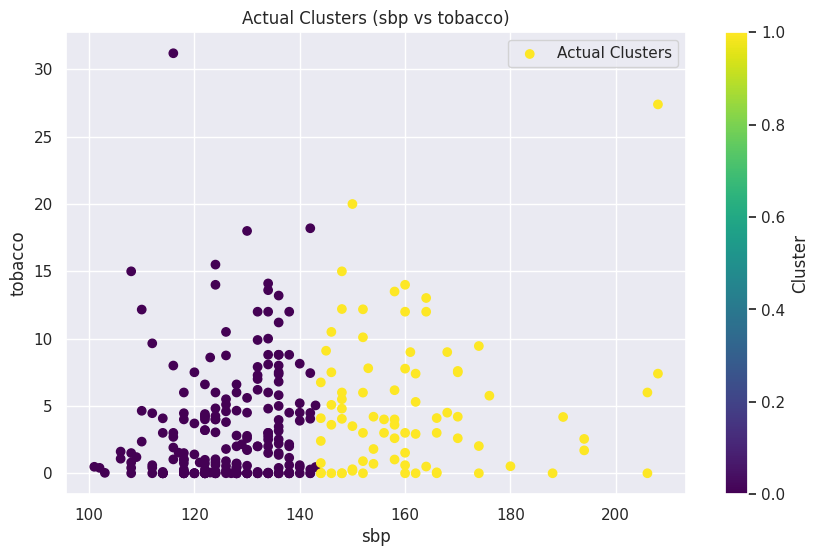

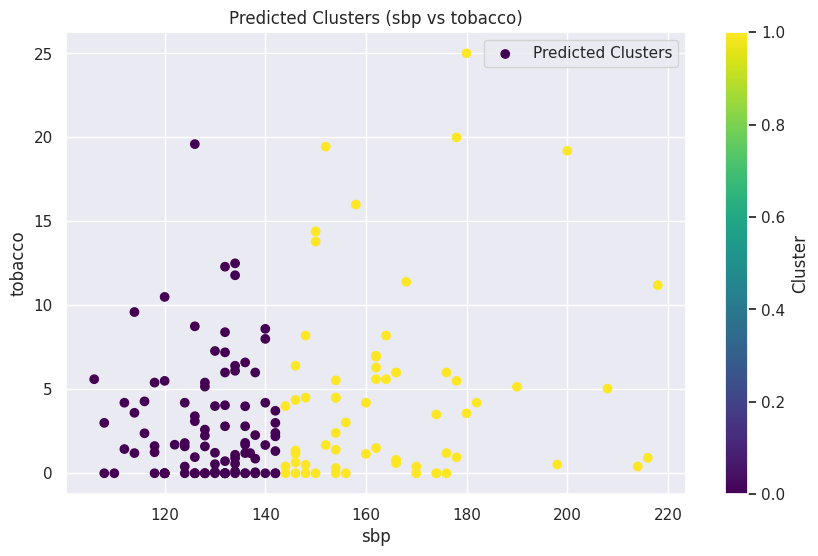

In [5]:
train_data = df[['sbp', 'tobacco']].iloc[:300].values
test_data = df[['sbp', 'tobacco']].iloc[300:].values

n_clusters = 2
all_centers, train_labels, iterations = find_clusters(train_data, n_clusters)

# Predicts clusters for test data
test_labels = np.array([np.argmin([euclideanDistance(x, center) for center in all_centers[-1]]) for x in test_data])

# Calculates accuracy
accuracy = np.mean(test_labels == np.array([np.argmin([euclideanDistance(x, center) for center in all_centers[-1]]) for x in test_data]))
print(f"Accuracy: {accuracy:.2f}")

# Plotting 'sbp' vs 'tobacco' for actual data points with different colors based on their actual cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap='viridis', label='Actual Clusters')
plt.title('Actual Clusters (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

# Plotting 'sbp' vs 'tobacco' for predicted data points with different colors based on their predicted cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='viridis', label='Predicted Clusters')
plt.title('Predicted Clusters (sbp vs tobacco)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

Cluster 1: [array([ 2, 10]), array([5, 8]), array([4, 9])]
Cluster 2: [array([2, 5]), array([1, 2])]
Cluster 3: [array([8, 4]), array([7, 5]), array([6, 4])]


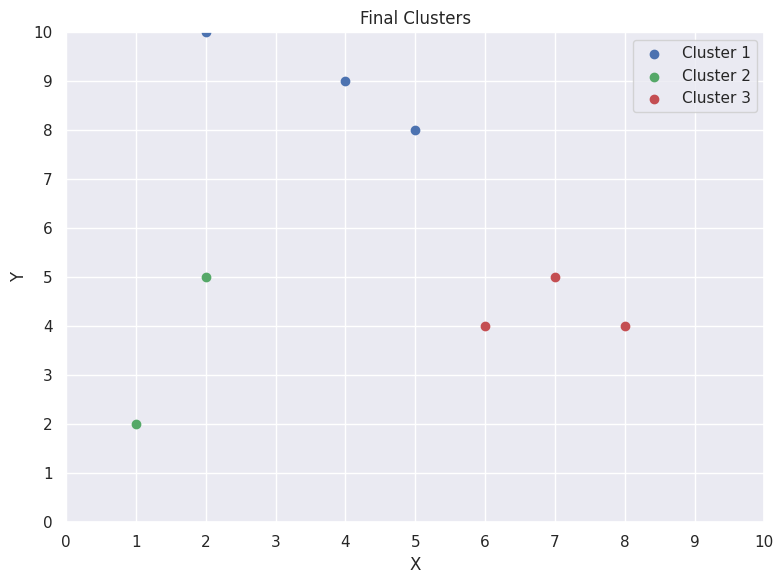

In [6]:
import numpy as np

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to find the closest cluster to a given point
def find_closest_cluster(point, clusters):
    closest_cluster_idx = None
    min_distance = float('inf')
    for i, cluster in enumerate(clusters):
        for cluster_point in cluster:
            distance = euclidean_distance(point, cluster_point)
            if distance < min_distance:
                min_distance = distance
                closest_cluster_idx = i
    return closest_cluster_idx

# Function to perform Nearest Neighbor clustering
def nearest_neighbor_clustering(points, threshold):
    clusters = []
    for point in points:
        closest_cluster_idx = find_closest_cluster(point, clusters)
        if closest_cluster_idx is not None and min(euclidean_distance(point, cluster_point) for cluster_point in clusters[closest_cluster_idx]) <= threshold:
            clusters[closest_cluster_idx].append(point)
        else:
            clusters.append([point])
    return clusters

# Define points and threshold
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
threshold = 4

# Perform Nearest Neighbor clustering
clusters = nearest_neighbor_clustering(points, threshold)

# Plot the final clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title('Final Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(11))
plt.yticks(range(11))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



### **PART B**

**Q9:** the results are the same. Clusters and the points for each clusteris below:

*Cluster1:* A1=[2,10], A4=[5,8], A8=[4,9]

*Cluster2:* A2=[2,5], A7=[1,2]

*Cluster3:* A3=[8,4], A5=[7,5], A6=[6,4]

**Q10:** Plot is provided below

**Q11:**
As seen in the result, the clusters found using the k-Nearest Neighbour algorithm have the same points as found using the k-means algorithm. Next we will compare their performances in general.

**K means,** tends to work well with lare datasets but can be sesnsitive to the choice of first cluster centers, data points are assigned to a single cluster so no overlapping.

**Nearest Neighbor,** can become expensive as the datset grows, may result in overlapping clusters since data points are assigned to its neighbors.

Possible Disadvantages on bigger datasets:
- Can Be Costly: k-Nearest Neighbour algorithm takes up more memory and data storage compared to other classifiers. This can be costly from both a time and money perspective.

- More Featues More Errors: When dealing with high-dimensional data inputs, the KNN method is prone to experiencing problems like overfitting. After the algorithm attains the optimal number of features, additional features increases the amount of classification errors, especially when the sample size is smaller.

- Prone to Overfitting: The value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data.

In [7]:
train_data = df[['sbp', 'tobacco']].iloc[:300].values
test_data = df[['sbp', 'tobacco']].iloc[300:].values

# Perform nearest neighbor clustering on training data
train_clusters = nearest_neighbor_clustering(train_data, threshold)

# Assign cluster labels to test data
test_labels = []
for point in test_data:
    closest_cluster_idx = find_closest_cluster(point, train_clusters)
    test_labels.append(closest_cluster_idx)

# Calculate accuracy
true_labels = [0] * len(test_data)  # Assuming all test points belong to the same cluster for simplicity
accuracy = np.mean(np.array(test_labels) == np.array(true_labels))
print(f"Q12: Accuracy: {accuracy:.2f}")

Q12: Accuracy: 0.01


### **PART C**

Q13 and Q14 plots are provided below

Cluster 1:
[8 4]
[7 5]
[6 4]

Cluster 2:
[5 8]
[4 9]

Noise points:
[ 2 10]
[2 5]
[1 2]


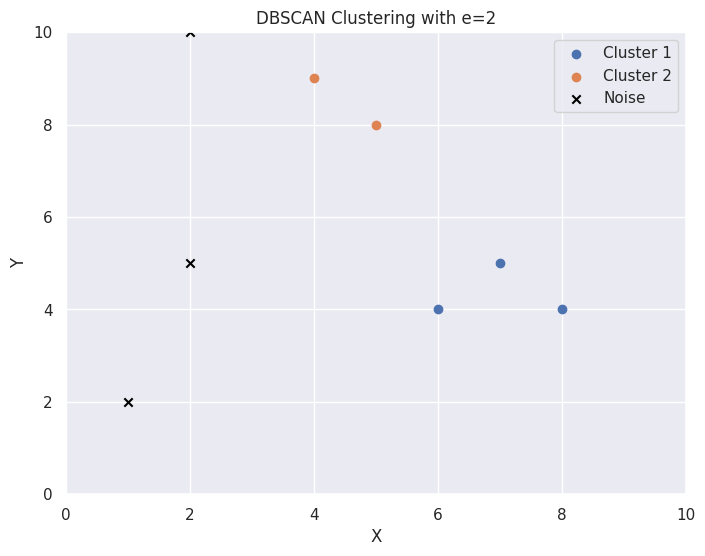

Cluster 1:
[ 2 10]
[4 9]
[5 8]

Cluster 2:
[2 5]
[1 2]

Cluster 3:
[8 4]
[7 5]
[6 4]

Noise points:


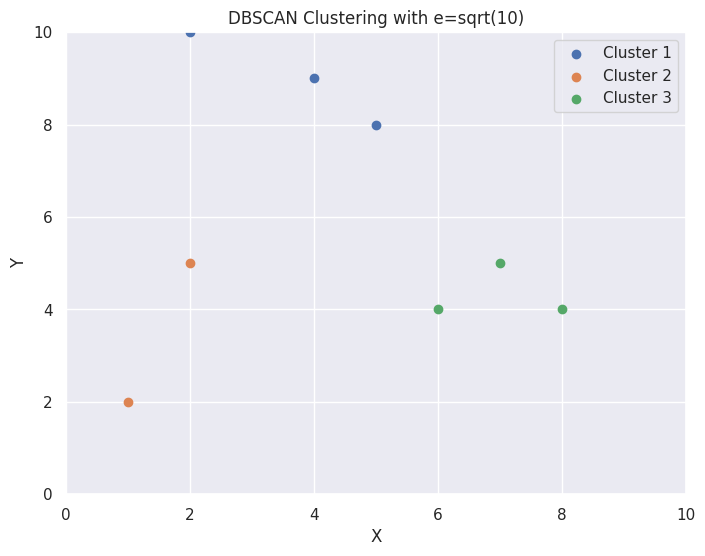

In [8]:
def dbscan(data, epsilon, min_points):
    num_points = len(data)
    labels = np.full(num_points, -1)  # Initialize all points as noise (-1)
    cluster_id = 0
    clusters = {}

    for i in range(num_points):
        if labels[i] != -1:  # Skip already processed points
            continue

        neighbors = [j for j in range(num_points) if euclidean_distance(data[i], data[j]) <= epsilon]
        if len(neighbors) < min_points:
            labels[i] = 0  # Label as noise (0)
        else:
            cluster_id += 1
            labels[i] = cluster_id  # Assign current point to current cluster
            cluster_points = [data[i]]  # Initialize cluster with current point
            while len(neighbors) > 0:
                neighbor_index = neighbors.pop(0)
                if labels[neighbor_index] == -1:  # Process unprocessed neighbors
                    labels[neighbor_index] = cluster_id  # Assign neighbor to current cluster
                    cluster_points.append(data[neighbor_index])  # Add neighbor to cluster
                    neighbor_neighbors = [j for j in range(num_points) if euclidean_distance(data[neighbor_index], data[j]) <= epsilon]
                    if len(neighbor_neighbors) >= min_points:
                        neighbors.extend(neighbor_neighbors)
            clusters[cluster_id] = cluster_points

    noise_points = [data[i] for i, label in enumerate(labels) if label == 0]
    return clusters, noise_points

epsilon = 2
min_points = 2
clusters, noise_points = dbscan(points, epsilon, min_points)

# Display clusters and their points
for cluster_id, cluster_points in clusters.items():
    print(f"Cluster {cluster_id}:")
    for point in cluster_points:
        print(point)
    print()

# Display noise points
print("Noise points:")
for point in noise_points:
    print(point)

# Plot clusters and noise points
plt.figure(figsize=(8, 6))
for cluster_id, cluster_points in clusters.items():
    cluster_points = np.array(cluster_points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

noise_points = np.array(noise_points)
plt.scatter(noise_points[:, 0], noise_points[:, 1], color='black', marker='x', label='Noise')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('DBSCAN Clustering with e=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

epsilon = 10**(1/2)
clusters, noise_points = dbscan(points, epsilon, min_points)

# Display clusters and their points
for cluster_id, cluster_points in clusters.items():
    print(f"Cluster {cluster_id}:")
    for point in cluster_points:
        print(point)
    print()

# Display noise points
print("Noise points:")
for point in noise_points:
    print(point)

# Plot clusters and noise points
plt.figure(figsize=(8, 6))
for cluster_id, cluster_points in clusters.items():
    cluster_points = np.array(cluster_points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

noise_points = np.array(noise_points)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('DBSCAN Clustering with e=sqrt(10)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
train_clusters, _ = dbscan(train_data, epsilon, min_points)

# Assign cluster labels to test data using DBSCAN clustering on training data
test_labels = []
for point in test_data:
    closest_cluster_idx = find_closest_cluster(point, train_clusters.values())
    test_labels.append(closest_cluster_idx)

# Calculate accuracy
true_labels = [0] * len(test_data)  # Assuming all test points belong to the same cluster for simplicity
accuracy = np.mean(np.array(test_labels) == np.array(true_labels))
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


##Q15:
Accuracy is 0.87

In general terms, the comparison goes the same for both Datasets: Dataset1 and Dataset2

**K-means:**
-  We need to specify the number of clusters beforehand
-  The globally optimal result may not be achieved
-  k-means is limited to linear cluster boundaries

**Nearest Neighbor:**
- Assigning points to its nearest neighbor may result in clusters that sre more flexible in shape and size.

**DBSCAN**
- Doesn't require specifying the number of clusters and it is robust to noise.
- The algorithm requires two parameters: epsilon (ε) and the minimum number of points (minPts) required to form a dense region


#PartD

**K-means**, **K-Nearest Neighbor**, and **DBSCAN** is provided using sklearn in this order

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


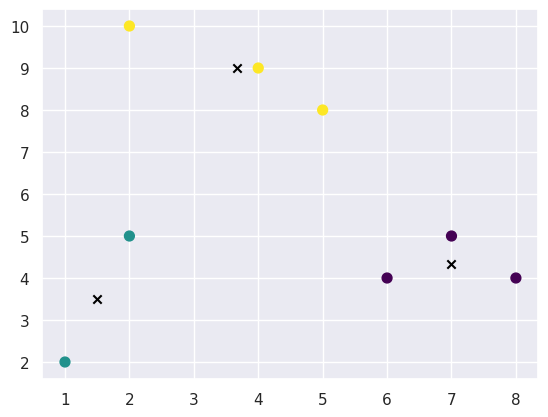

In [10]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

# Define the data
points = np.array([[2,10], [2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the clusters and centers
plt.scatter(points[:, 0], points[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black',  marker='x', label='Centers')
plt.show()


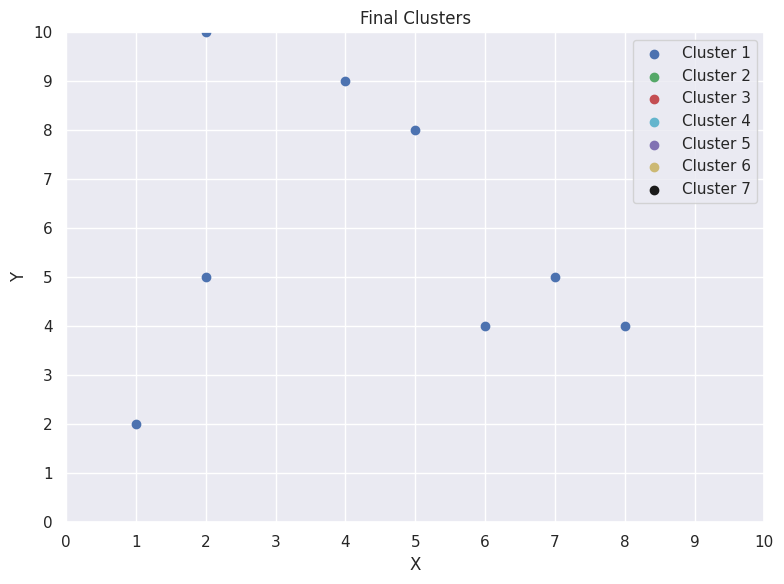

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define points and threshold
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
threshold = 4

# Perform Nearest Neighbor clustering
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(points, np.zeros(len(points)))  # Fit with dummy labels

# Predict the labels for the same points
labels = knn.predict(points)

# Plot the final clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in enumerate(colors):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {i+1}')

plt.title('Final Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(11))
plt.yticks(range(11))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


-----------------------------------------
Apply DBSCAN for (eps=2, min_samples=2)
-----------------------------------------
Cluster labels: [-1 -1  0  1  0  0 -1  1]
Number of clusters: 2
Cluster 1 : [[8 4]
 [7 5]
 [6 4]]
Cluster 2 : [[5 8]
 [4 9]]
Cluster 0 : [[ 2 10]
 [ 2  5]
 [ 1  2]]
Noise points: [[ 2 10]
 [ 2  5]
 [ 1  2]]
-----------------------------------------------
Apply DBSCAN for (eps=sqrt(10), min_samples=2)
-----------------------------------------------
Cluster labels: [0 1 2 0 2 2 1 0]
Number of clusters: 3
Cluster 1 : [[ 2 10]
 [ 5  8]
 [ 4  9]]
Cluster 2 : [[2 5]
 [1 2]]
Cluster 3 : [[8 4]
 [7 5]
 [6 4]]
Noise points: []


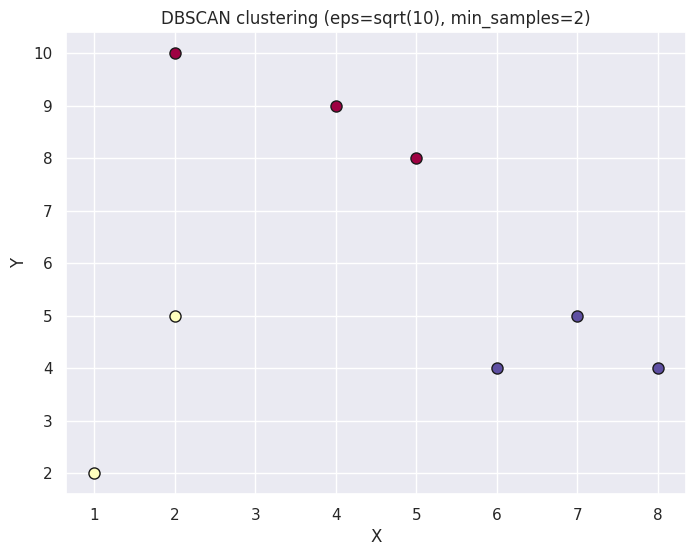

Cluster labels: [0 1 2 0 2 2 1 0]
Number of clusters: 3
Cluster 1 : [[ 2 10]
 [ 5  8]
 [ 4  9]]
Cluster 2 : [[2 5]
 [1 2]]
Cluster 3 : [[8 4]
 [7 5]
 [6 4]]
Noise points: []


In [13]:

# Define the dataset
X = np.array([[2,10], [2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])


print("-----------------------------------------")
print("Apply DBSCAN for (eps=2, min_samples=2)")
print("-----------------------------------------")

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=2, min_samples=2).fit(X)
labels = db.labels_


# Print the clusters and the noise points

print("Cluster labels:", labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])

print("Noise points:", X[labels == -1])

print("-----------------------------------------------")
print("Apply DBSCAN for (eps=sqrt(10), min_samples=2)")
print("-----------------------------------------------")

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(X)
labels = db.labels_

# Print the clusters and the noise points

print("Cluster labels:", labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])

print("Noise points:", X[labels == -1])

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(X)
labels = db.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)
plt.title('DBSCAN clustering (eps=sqrt(10), min_samples=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Print the clusters and the noise points
print("Cluster labels:", labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])
print("Noise points:", X[labels == -1])

##Q16

Comparison of with and without the use of sklearn in calculation of k-means, k-NN, and DBSCAN:

- Using scikit-learn provides a convenient and consistent interface for various clustering algorithms.
- The implementation details are handled by scikit-learn, making it easier to experiment with different algorithms and parameters.
- Scikit-learn also provides additional functionalities such as model evaluation metrics and visualization tools, which can aid in analyzing clustering results.

In summary, using scikit-learn simplifies the process of performing clustering and facilitates comparison between different algorithms and datasets.


**Questions from the description box:**
****

**1)** What are the different metrics used to evaluate the performance of different clustering algorithms?

**Silhouette Score, Davies-Bouldin Index, and Adjusted Rand Index are commonly used metrics to evaluate clustering model performance**

****

**2)** Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

**Similarity(Adjusted Rand Index), cohesion, separation, density, and compactness**